# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [31]:
# complete this function implementation
def hypothesis(x, theta):
  return theta[0] + theta[1]*x

**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [32]:
# complete this function implementation
def loss(hypothesis_x, y):
  m=len(y)
  return (1/2*m) * np.sum(np.square(hypothesis(x, theta) - y))

**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [38]:
# complete this function implementation
def gradientDescent(x, y, theta, numIterations=15000, alpha=0.015):
    m=len(x)
    cost = 0
    for i in range(numIterations):
      for j in range(m):
        hx = hypothesis(x[j], theta)
        theta[0] -= (alpha*(1/m)*np.sum(hx-y[j]))
        theta[1] -= (alpha*((1/m)*np.sum((hx-y[j])*x[j])))
        cost=(loss(hx,y[j]))
      if (i+1)%500==0:
        print("Cost at iteration:", i+1, ":",cost)

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [34]:
data1=pd.read_csv("/Update_FactoryRevenue.csv")
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


**Part E -**
Remove rows that have any null values

In [35]:
new_data = data1.dropna()
print("Number of rows before: ",len(data1))
print("Number of rows containing null data: ",data1.isna().sum().sum())
print("Number of rows after: ",len(new_data))

Number of rows before:  99
Number of rows containing null data:  2
Number of rows after:  97


**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [36]:
# independant variable: x : TotalFactoryWorkers
# dependant variable: y: AnnualProfit
x = np.array(new_data.loc[:, new_data.columns == 'TotalFactoryWorkers'])
y= np.array(new_data.loc[:, new_data.columns == 'AnnualProfit'])

**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [39]:
theta0=0.0
theta1=0.0
theta=np.array([theta0,theta1])
gradientDescent(x,y,theta)
print("y-intercept: ",theta[0])
print("slope: ",theta[1])

Cost at iteration: 500 : 860.9963363270405
Cost at iteration: 1000 : 978.8331501534984
Cost at iteration: 1500 : 1010.5856369927158
Cost at iteration: 2000 : 1018.8034460785682
Cost at iteration: 2500 : 1020.9093691119889
Cost at iteration: 3000 : 1021.4476935688357
Cost at iteration: 3500 : 1021.5852146840089
Cost at iteration: 4000 : 1021.620340314489
Cost at iteration: 4500 : 1021.6293117276958
Cost at iteration: 5000 : 1021.6316030859289
Cost at iteration: 5500 : 1021.632188312381
Cost at iteration: 6000 : 1021.6323377825762
Cost at iteration: 6500 : 1021.6323759581118
Cost at iteration: 7000 : 1021.6323857083651
Cost at iteration: 7500 : 1021.6323881986344
Cost at iteration: 8000 : 1021.6323888346622
Cost at iteration: 8500 : 1021.6323889971087
Cost at iteration: 9000 : 1021.6323890385981
Cost at iteration: 9500 : 1021.6323890491869
Cost at iteration: 10000 : 1021.6323890518696
Cost at iteration: 10500 : 1021.6323890526019
Cost at iteration: 11000 : 1021.632389052745
Cost at itera

**Part H -** Plot a scatter plot and regression line on the same graph

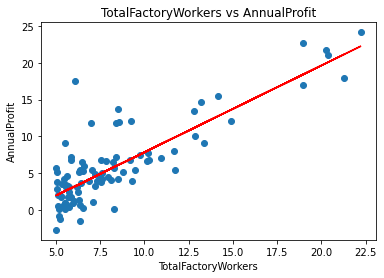

In [40]:
plt.title("TotalFactoryWorkers vs AnnualProfit")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.scatter(x, y)
plt.plot(x,hypothesis(x,theta),color='red')
plt.show()

---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [41]:
data=pd.read_csv("/FlowersData.csv")
print(data.describe())
new_data = data.dropna()
print("\nNumber of rows before: ",len(data))
print("Number of rows containing null data: ",data.isna().sum().sum())
print("Number of rows after: ",len(new_data))

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Number of rows before:  150
Number of rows containing null data:  0
Number of rows after:  150


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [42]:
col_names=['sepal_length','sepal_width','petal_length','petal_width']
x=np.array(data[col_names])
y=np.array(data.flower_name)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [43]:
scaling_x = StandardScaler()
x_train = scaling_x.fit_transform(x_train) 
x_test = scaling_x.transform(x_test)

**Part D** - Train Model using SKLearn LogisticRegression

In [44]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

**Part E** - Predict Labels for test split

In [45]:
y_pred = classifier.predict(x_test)

---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

In [46]:
cm = confusion_matrix(y_test, y_pred)  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[15  0  1]
 [ 0 13  0]
 [ 0  0  9]]


**Part B** - Calculate and print Accuracy

In [47]:
print ("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9736842105263158


**Part C** - Calculate and print Recall

In [48]:
Recall=recall_score(y_test, y_pred, average='macro')
print ("Recall: ", Recall)

Recall:  0.9791666666666666


**Part D** - Calculate and print Precision

In [49]:
Precision=precision_score(y_test, y_pred, average='macro')
print ("Precision: ", Precision)

Precision:  0.9666666666666667


**Part E** - Calculate and print $𝐹_1$ Score

In [50]:
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
print("F1_score: ", F1_score)

F1_score:  0.972876516773733
